In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define fitting functions
def linear(x, a, b):
    return a * x + b

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

def exponential(x, a, b):
    return a * np.exp(b * x)

# Function to fit data and plot
def fit_and_plot(data_file, fit_type):
    # Load data from CSV
    data = pd.read_csv(data_file, sep=';')

    if "x" not in data.columns or "y" not in data.columns:
        raise ValueError("CSV file must contain 'x' and 'y' columns.")

    x = data["x"].values
    y = data["y"].values

    # Fit the data
    if fit_type == "linear":
        popt, _ = curve_fit(linear, x, y)
        y_fit = linear(x, *popt)
        fit_label = f"y = {popt[0]:.2f}x + {popt[1]:.2f}"
    elif fit_type == "quadratic":
        popt, _ = curve_fit(quadratic, x, y)
        y_fit = quadratic(x, *popt)
        fit_label = f"y = {popt[0]:.2f}x^2 + {popt[1]:.2f}x + {popt[2]:.2f}"
    elif fit_type == "exponential":
        popt, _ = curve_fit(exponential, x, y)
        y_fit = exponential(x, *popt)
        fit_label = f"y = {popt[0]:.2f}e^({popt[1]:.2f}x)"
    else:
        raise ValueError("Invalid fit type. Choose from 'linear', 'quadratic', or 'exponential'.")

    # Plot the data and the fit
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Data", color="blue")
    plt.plot(x, y_fit, label=fit_label, color="red")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{fit_type.capitalize()} Fit")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage (uncomment to use)
# fit_and_plot('data.csv', 'linear')


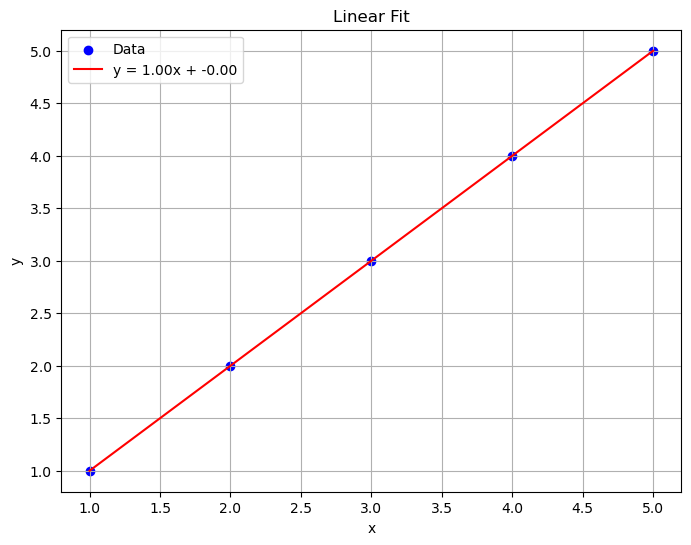

In [2]:
fit_and_plot('linear_data.csv', 'linear')